# **Download the Dataset**

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
cd/content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!unzip Flowers-Dataset.zip

# **Image Augmentation**

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [55]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [56]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [57]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [58]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# **Create Model**

In [59]:
model=Sequential()

# **Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)**

**Convolution Layer**

In [60]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

**MaxPooling Layer**

In [61]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Flatten Layer**

In [62]:
model.add(Flatten())

**Dense-(Hidden Layers)**

In [71]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=150,kernel_initializer="random_uniform",activation="relu"))

**Output Layer**

In [72]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               9225900   
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 dense_5 (Dense)             (None, 4)                 804       
                                                      

# **Compile The Model**

In [74]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

# **Fit The Model**

In [75]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
135/135 [==============================] - 59s 433ms/step - loss: 1.6026 - accuracy: 0.2391 - val_loss: 1.5987 - val_accuracy: 0.2437
Epoch 2/5
135/135 [==============================] - 58s 428ms/step - loss: 1.5997 - accuracy: 0.2437 - val_loss: 1.5988 - val_accuracy: 0.2437
Epoch 3/5
135/135 [==============================] - 58s 430ms/step - loss: 1.5996 - accuracy: 0.2437 - val_loss: 1.5986 - val_accuracy: 0.2437
Epoch 4/5
135/135 [==============================] - 115s 856ms/step - loss: 1.5996 - accuracy: 0.2365 - val_loss: 1.5988 - val_accuracy: 0.2437
Epoch 5/5
135/135 [==============================] - 59s 438ms/step - loss: 1.5994 - accuracy: 0.2437 - val_loss: 1.5985 - val_accuracy: 0.2437


# **Save The Model**

In [76]:
model.save("flower.h5")

# **Test The Model**

In [77]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [95]:
model = load_model('flower.h5')
img = image.load_img('/content/drive/MyDrive/flowers/daisy/10555826524_423eb8bf71_n.jpg',target_size=(64,64))

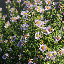

In [96]:
img

In [97]:
x=image.img_to_array(img)

In [98]:
x

array([[[ 49.,  55.,  55.],
        [ 53.,  59.,  59.],
        [ 50.,  59.,  58.],
        ...,
        [120., 122., 100.],
        [ 99., 116.,  71.],
        [149., 173.,  99.]],

       [[ 53.,  59.,  59.],
        [ 50.,  56.,  56.],
        [ 50.,  56.,  56.],
        ...,
        [ 61.,  68.,  14.],
        [ 87., 102.,  63.],
        [ 52.,  64.,  52.]],

       [[ 47.,  53.,  53.],
        [ 43.,  49.,  49.],
        [ 45.,  54.,  53.],
        ...,
        [ 93., 122.,  32.],
        [ 74.,  94.,  43.],
        [ 59.,  76.,  32.]],

       ...,

       [[  8.,  18.,   7.],
        [ 33.,  40.,  24.],
        [ 19.,  27.,  14.],
        ...,
        [149., 165., 118.],
        [136., 151.,  84.],
        [117., 142.,  50.]],

       [[ 10.,  18.,   7.],
        [ 46.,  56.,  29.],
        [  6.,  16.,   5.],
        ...,
        [ 77.,  89.,  53.],
        [ 53.,  70.,  26.],
        [160., 183.,  95.]],

       [[  5.,   6.,   1.],
        [ 10.,  16.,   6.],
        [  8.,  

In [99]:
x.shape

(64, 64, 3)

In [100]:
x=np.expand_dims(x,axis=0)

In [101]:
y=np.argmax(model.predict(x),axis=0)

In [102]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [103]:
array=['daisy','dandelion','rose','sunflower']

In [104]:
array[y[0]]

'daisy'

In [105]:
img=image.load_img(r"/content/drive/MyDrive/flowers/dandelion/11545123_50a340b473_m.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
array=['daisy','dandelion','rose','sunflower']
array[y[0]]

'dandelion'

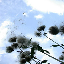

In [106]:
img

In [107]:
img=image.load_img(r"/content/drive/MyDrive/flowers/rose/13231224664_4af5293a37.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
array=['daisy','rose','dandelion','sunflower']
array[y[0]]

'rose'

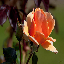

In [108]:
img

In [109]:
img=image.load_img(r"/content/drive/MyDrive/flowers/sunflower/1244774242_25a20d99a9.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=0)
array=['sunflower','daisy','dandelion','rose']
array[y[0]]

'sunflower'

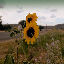

In [110]:
img